# Import Libaries and data

In [1]:
import pandas as pd #used for data preparation
import numpy as np  #used for linear operations
import matplotlib.pyplot as plt # used for data representation
from textblob import TextBlob   #used for centiment analysis
import plotly.express as px

#Loading Data
path = "netflix_titles.csv"
df = pd.read_csv(path)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Checking number of rows and columns in data

In [2]:
df.shape

(8807, 12)

# How to check columns name of dataset

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Checking Mean, Std, min etc values of all numerical columns

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
y = df.groupby(['rating']).count()
y

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description
rating,,,,,,,,,,,
66 min,1,1,1,1,1,1,1,1,0,1,1
74 min,1,1,1,1,1,1,1,1,0,1,1
84 min,1,1,1,1,1,1,1,1,0,1,1
G,41,41,41,41,40,41,41,41,41,41,41
NC-17,3,3,3,2,3,3,3,3,3,3,3
NR,80,80,80,75,63,80,79,80,80,80,80
PG,287,287,287,286,279,281,287,287,287,287,287
PG-13,490,490,490,489,477,482,490,490,490,490,490
R,799,799,799,795,790,788,799,799,799,799,799


# Taking the count of ratings available

In [7]:
x = df.groupby('rating').size().reset_index(name='counts')
x

,rating,counts
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,80
6,PG,287
7,PG-13,490
8,R,799
9,TV-14,2160


# Plotting Different Visual Representation

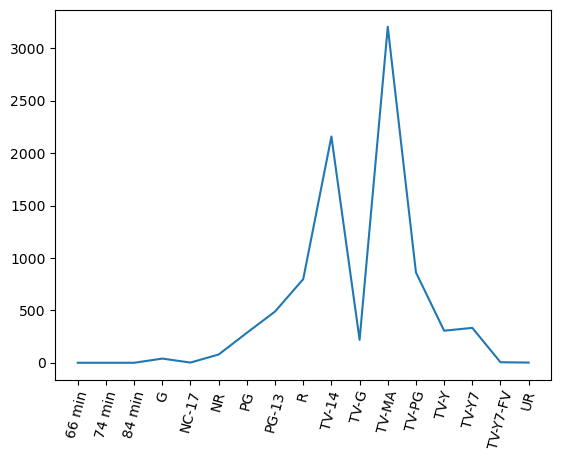

In [8]:
plt.plot(x['rating'], x['counts'])
plt.xticks(rotation=75)
plt.show()

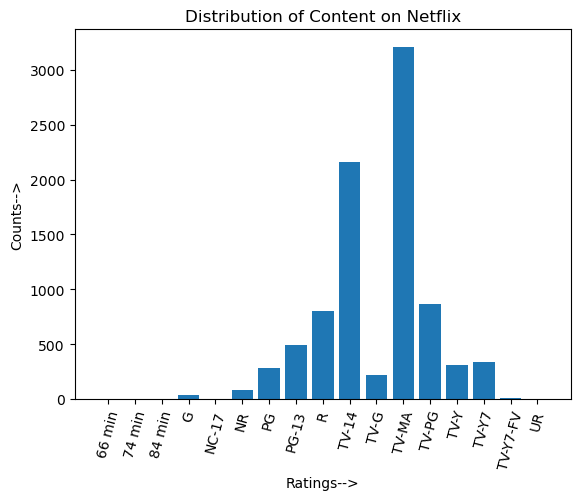

In [9]:
plt.bar(x.rating, x.counts)
plt.title('Distribution of Content on Netflix')
plt.xlabel('Ratings-->')
plt.ylabel('Counts-->')
plt.xticks(rotation=75)
plt.show()

In [10]:
pieChart = px.pie(x, values='counts', names='rating', title='Distribution of Content')
pieChart

# Analyzing the top 5 Directors on Netflix

In [11]:
df['director'] = df['director'].fillna('Director Not Specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director Not Specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
directors_list = pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [13]:
directors_list  = df['director'].str.split(',', expand=True).stack()
# .str.split(',', expand=True)
'''This splits the director string into separate columns wherever there’s a comma.
original string	= "Ruben Fleischer, Peter Hewitt" | "Director Not Specified" | "A, B, C"
after split = ["Ruben Fleischer", "Peter Hewitt"] | ["Director Not Specified", None] | ["A", "B", "C"]'''


'''Those 0s in the middle column are just the column numbers created after the split.
They are not director names.
They are not data.
They are simply part of the MultiIndex created by stack().'''

# .stack()
'''This takes all the columns created in the split and stacks them into a single column, removing NULLs.'''
directors_list

0     0           Kirsten Johnson
1     0    Director Not Specified
2     0           Julien Leclercq
3     0    Director Not Specified
4     0    Director Not Specified
                    ...          
8802  0             David Fincher
8803  0    Director Not Specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object

In [14]:
directors_list = directors_list.to_frame()
'''Here it is now in form of rows and columns, at first it was in form of length and datatype'''
print(directors_list)

                             0
0    0         Kirsten Johnson
1    0  Director Not Specified
2    0         Julien Leclercq
3    0  Director Not Specified
4    0  Director Not Specified
...                        ...
8802 0           David Fincher
8803 0  Director Not Specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [15]:
#giving the name to our column
directors_list.columns = ['Directors']
directors_list

,,Directors
0,0,Kirsten Johnson
1,0,Director Not Specified
2,0,Julien Leclercq
3,0,Director Not Specified
4,0,Director Not Specified
...,...,...
8802,0,David Fincher
8803,0,Director Not Specified
8804,0,Ruben Fleischer
8805,0,Peter Hewitt


In [16]:
# counting the total number of directers int every row
directors = directors_list.groupby('Directors').size().reset_index(name='total_counts')
directors

,Directors,total_counts
0,Aaron Moorhead,2
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
5116,Çagan Irmak,1
5117,Ísold Uggadóttir,1
5118,Óskar Thór Axelsson,1
5119,Ömer Faruk Sorak,2


In [17]:
directors = directors[directors['Directors'] != 'Director Not Specified']
directors

,Directors,total_counts
0,Aaron Moorhead,2
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
5116,Çagan Irmak,1
5117,Ísold Uggadóttir,1
5118,Óskar Thór Axelsson,1
5119,Ömer Faruk Sorak,2


In [18]:
directors = directors.sort_values(by='total_counts', ascending=False)
directors

,Directors,total_counts
4021,Rajiv Chilaka,22
4068,Raúl Campos,18
261,Jan Suter,18
4652,Suhas Kadav,16
3236,Marcus Raboy,16
...,...,...
2341,J. Davis,1
2342,J. Lee Thompson,1
2343,J. Michael Long,1
609,Smriti Keshari,1


In [19]:
top_five_directors = directors.head()
top_five_directors

,Directors,total_counts
4021,Rajiv Chilaka,22
4068,Raúl Campos,18
261,Jan Suter,18
4652,Suhas Kadav,16
3236,Marcus Raboy,16


Text(0.5, 0, 'Movies And TV Shows')

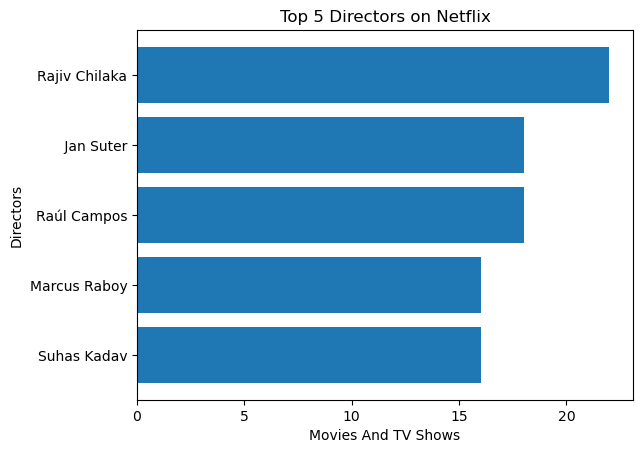

In [20]:
top_five_directors = top_five_directors.sort_values(by='total_counts', ascending=True)
plt.barh(top_five_directors['Directors'], top_five_directors['total_counts'])
plt.title('Top 5 Directors on Netflix')
plt.ylabel('Directors')
plt.xlabel('Movies And TV Shows')

# Analyzing Top 5 Actors

In [21]:
df['cast'] = df['cast'].fillna('No Cast Specified')
df['cast']

0                                       No Cast Specified
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                       No Cast Specified
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                    No Cast Specified
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [22]:
cast_df = pd.DataFrame()
cast_df = df['cast'].str.split(',', expand=True).stack()
cast_df

0     0         No Cast Specified
1     0                Ama Qamata
      1               Khosi Ngema
      2             Gail Mabalane
      3            Thabang Molaba
                    ...          
8806  3          Manish Chaudhary
      4              Meghna Malik
      5             Malkeet Rauni
      6            Anita Shabdish
      7     Chittaranjan Tripathy
Length: 64951, dtype: object

In [23]:
cast_df = cast_df.to_frame()


In [24]:
cast_df

0
0    0       No Cast Specified
1    0              Ama Qamata
     1             Khosi Ngema
     2           Gail Mabalane
     3          Thabang Molaba
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[64951 rows x 1 columns]

In [25]:
cast_df.columns = ['Actors']
cast_df

Actors
0    0       No Cast Specified
1    0              Ama Qamata
     1             Khosi Ngema
     2           Gail Mabalane
     3          Thabang Molaba
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[64951 rows x 1 columns]

In [26]:
actors = cast_df.groupby('Actors').size().reset_index(name='Total_Counts')
actors

,Actors,Total_Counts
0,Jr.,2
1,"""Riley"" Lakdhar Dridi",1
2,'Najite Dede,1
3,2 Chainz,1
4,2Mex,1
...,...,...
39292,İbrahim Büyükak,1
39293,İbrahim Çelikkol,1
39294,Şahin Irmak,1
39295,Şükrü Özyıldız,1


In [27]:
actors = actors[actors['Actors'] != 'No Cast Specified']
actors

,Actors,Total_Counts
0,Jr.,2
1,"""Riley"" Lakdhar Dridi",1
2,'Najite Dede,1
3,2 Chainz,1
4,2Mex,1
...,...,...
39292,İbrahim Büyükak,1
39293,İbrahim Çelikkol,1
39294,Şahin Irmak,1
39295,Şükrü Özyıldız,1


In [28]:
actors = actors.sort_values(by='Total_Counts', ascending=False)
actors

,Actors,Total_Counts
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27
...,...,...
15290,João Côrtes,1
15289,João Assunção,1
15288,Joziah Lagonoy,1
15287,Jozef Gjura,1


In [29]:
top_five_actors = actors.head()

In [30]:
top_five_actors = top_five_actors.sort_values(by='Total_Counts', ascending=False)
top_five_actors

,Actors,Total_Counts
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28
23624,Om Puri,27


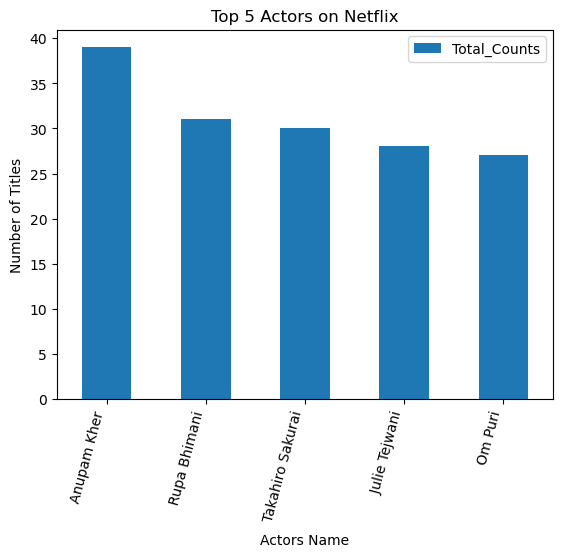

In [31]:
top_five_actors.plot( x='Actors', y='Total_Counts', kind='bar')
plt.xlabel("Actors Name")
plt.ylabel("Number of Titles")
plt.title("Top 5 Actors on Netflix")
plt.xticks(rotation=75, ha='right')

plt.show()

# Analyzing the content produced on netflix based on years

In [32]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast Specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director Not Specified,No Cast Specified,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [33]:
#counts = df[['release_year', 'type']].value_counts().reset_index(name='release_year')
#reset_index(name='release_year') means Create a new column called release_year for the counts.
'''counts = df[['release_year', 'type']].value_counts().reset_index(name='Total_counts')

#Rename the columns
counts.columns = ['Release_Year', 'Type', 'Total_Counts']
counts = counts.sort_values(by='Total_Counts')
counts'''

counts = df[['type', 'release_year']]
counts = counts.rename(columns={'release_year':'Release_Year', 'type':'Type'})
counts = counts.groupby(['Release_Year', 'Type']).size().reset_index(name='Total_Counts')
counts

,Release_Year,Type,Total_Counts
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


In [34]:
trend = counts[counts['Release_Year']>=2000]
trend.head()

,Release_Year,Type,Total_Counts
75,2000,Movie,33
76,2000,TV Show,4
77,2001,Movie,40
78,2001,TV Show,5
79,2002,Movie,44


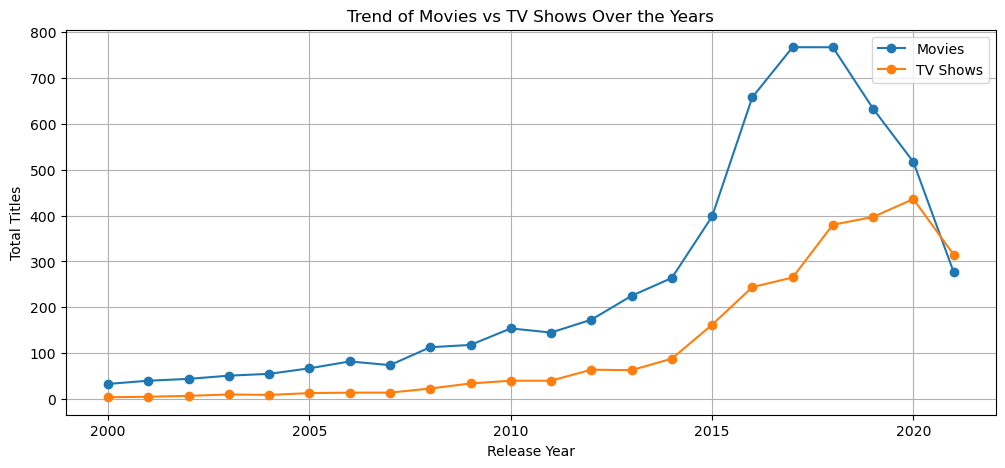

In [35]:
movies_trend = trend[trend['Type'] == 'Movie']
tv_trend = trend[trend['Type'] == 'TV Show']

plt.figure(figsize=(12, 5))

# Movies line
plt.plot(movies_trend['Release_Year'], movies_trend['Total_Counts'],label='Movies', marker='o')

# TV Shows line
plt.plot(tv_trend['Release_Year'], tv_trend['Total_Counts'],label='TV Shows', marker='o')

plt.xlabel("Release Year")
plt.ylabel("Total Titles")
plt.title("Trend of Movies vs TV Shows Over the Years")
plt.legend()                # show labels
plt.grid(True)              # optional
plt.show()

# graph = px.line(trend, x = 'Release_Year', y='Total_Counts', color='Type', title='Trend Of Content Produced On Netflix Every Year')
# graph.show()

# Which Country Produced the Most Content

In [36]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast Specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director Not Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director Not Specified,No Cast Specified,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director Not Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [37]:
country_score = pd.DataFrame()
country_score = df['country']
country_score = country_score.fillna('country_not_specified')
country_score

0               United States
1                South Africa
2       country_not_specified
3       country_not_specified
4                       India
                ...          
8802            United States
8803    country_not_specified
8804            United States
8805            United States
8806                    India
Name: country, Length: 8807, dtype: object

In [38]:
country = country_score.to_frame()#without converting this to to.frame() we were unable to select conditional rows, like country[country['country']!='Not specified'] for single coulumn
country = country.groupby('country').size().reset_index(name='total_counts')
country = country[country['country'] != 'country_not_specified']
country = country.sort_values(by='total_counts', ascending=False)
country

,country,total_counts
603,United States,2818
251,India,972
506,United Kingdom,419
319,Japan,245
435,South Korea,199
...,...,...
281,"Ireland, Canada, Luxembourg, United States, Un...",1
282,"Ireland, Canada, United Kingdom, United States",1
283,"Ireland, Canada, United States, United Kingdom",1
284,"Ireland, France, Iceland, United States, Mexic...",1


<Figure size 1200x500 with 0 Axes>

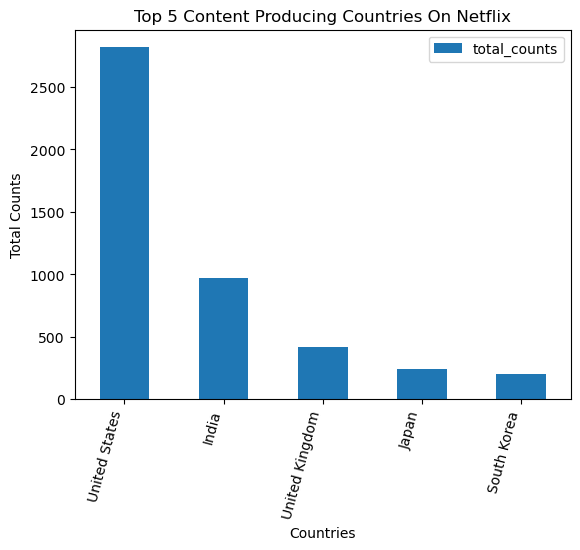

In [39]:
top_five_country = country.head()
plt.figure(figsize=(12,5))
top_five_country.plot(x='country', y='total_counts', kind='bar')
plt.xlabel('Countries')
plt.ylabel('Total Counts')
plt.title('Top 5 Content Producing Countries On Netflix')
plt.xticks(rotation=75, ha='right')
plt.legend()
plt.show()

# Sentiment Analysis of Netflix Content

-----

### Sentiment means the emotional tone of a sentence.
“A boy fights criminals to save his city.” → Positive / heroic

“A man struggles with grief after losing his family.” → Negative / sad

“A documentary about plants.” → Neutral

-----

### We will plot how many Positive, Neutral, Negative descriptions Netflix has.

#### STEP 1 — select and rename

In [40]:
sentiment_analysis = df[['release_year', 'description']]
sentiment_analysis = sentiment_analysis.rename(columns = {'release_year':'Release Year', 'description':'Description'})

### STEP 2 — sentiment calculation

In [41]:
'''
iterrows() gives you each row as a dictionary

index = row number

row = row data
'''

for index, row in sentiment_analysis.iterrows():
  d=row['Description']
  testimonial = TextBlob(d)
  p = testimonial.sentiment.polarity
  if p==0:
    sent = 'Neutral'
  elif p>0:
    sent = 'Positive'
  else:
    sent = 'Negative'
  sentiment_analysis.loc[index, 'Sentiment']=sent

### STEP 3 — grouping

In [42]:
sentiment_analysis = sentiment_analysis.groupby(['Release Year', 'Sentiment']).size().reset_index(name = 'Total Count')

sentiment_analysis = sentiment_analysis[sentiment_analysis['Release Year']>2005]

### STEP 5 — bar plot

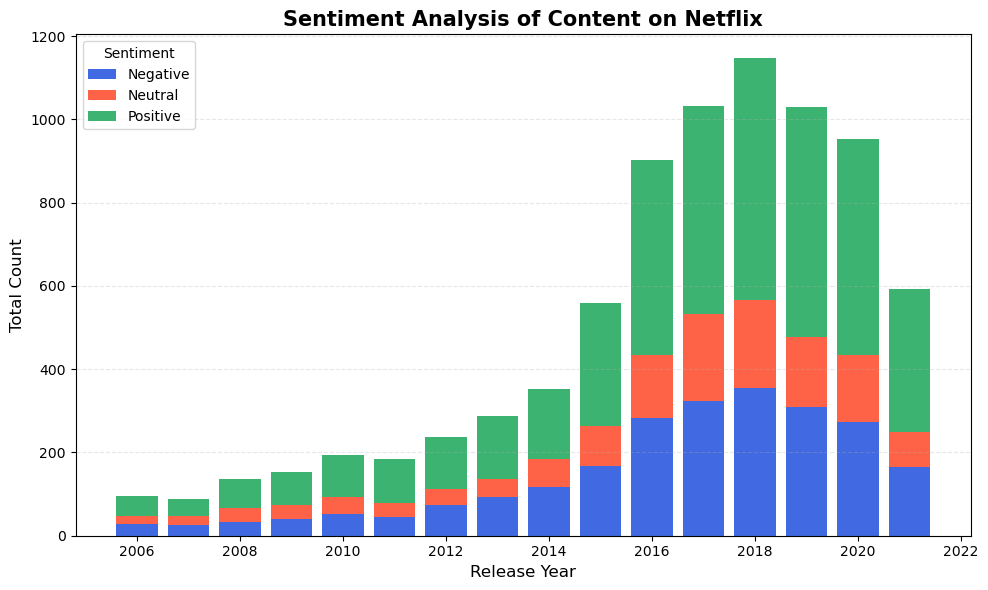

In [50]:
# Pivoting for stacked bar
pivot_data = sentiment_analysis.pivot(index="Release Year", columns="Sentiment", values="Total Count").fillna(0)

# Plotting
plt.figure(figsize=(10,6))

plt.bar(pivot_data.index, pivot_data['Negative'], label='Negative', color='royalblue')
plt.bar(pivot_data.index, pivot_data['Neutral'], bottom=pivot_data['Negative'], label='Neutral', color='tomato')
plt.bar(pivot_data.index, pivot_data['Positive'], bottom=pivot_data['Negative'] + pivot_data['Neutral'], label='Positive', color='mediumseagreen')

plt.title("Sentiment Analysis of Content on Netflix", fontsize=15, fontweight='bold')
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.legend(title="Sentiment")
plt.legend(title="Sentiment", loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()